In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *

In [3]:
path = untar_data(URLs.YELP_REVIEWS)

In [4]:
path

PosixPath('/root/.fastai/data/yelp_review_full_csv')

In [5]:
path.ls()

[PosixPath('/root/.fastai/data/yelp_review_full_csv/train.csv'),
 PosixPath('/root/.fastai/data/yelp_review_full_csv/models'),
 PosixPath('/root/.fastai/data/yelp_review_full_csv/test.csv'),
 PosixPath('/root/.fastai/data/yelp_review_full_csv/data_lm.pkl'),
 PosixPath('/root/.fastai/data/yelp_review_full_csv/data_clas.pkl'),
 PosixPath('/root/.fastai/data/yelp_review_full_csv/readme.txt')]

In [6]:
def display_head(file):
    df = pd.read_csv(path/file, header=None)
    print(df.head())

In [7]:
display_head('train.csv')

   0                                                  1
0  5  dr. goldberg offers everything i look for in a...
1  2  Unfortunately, the frustration of being Dr. Go...
2  4  Been going to Dr. Goldberg for over 10 years. ...
3  4  Got a letter in the mail last week that said D...
4  1  I don't know what Dr. Goldberg was like before...


In [8]:
display_head('test.csv')

   0                                                  1
0  1  I got 'new' tires from them and within two wee...
1  1  Don't waste your time.  We had two different p...
2  1  All I can say is the worst! We were the only 2...
3  1  I have been to this restaurant twice and was d...
4  1  Food was NOT GOOD at all! My husband & I ate h...


In [9]:
from fastai.utils.show_install import *
show_install()



```text
=== Software === 
python        : 3.7.4
fastai        : 1.0.59
fastprogress  : 0.1.21
torch         : 1.2.0
nvidia driver : 440.26
torch cuda    : 10.0.130 / is available
torch cudnn   : 7604 / is enabled

=== Hardware === 
nvidia gpus   : 1
torch devices : 1
  - gpu0      : 7982MB | GeForce RTX 2080

=== Environment === 
platform      : Linux-5.0.0-35-generic-x86_64-with-debian-buster-sid
distro        : #38~18.04.1-Ubuntu SMP Mon Nov 11 09:16:10 UTC 2019
conda env     : deeplearning
python        : /opt/anaconda3/envs/deeplearning/bin/python
sys.path      : /opt/fastai/fastai-exercises/nbs_gil/dl1
/opt/anaconda3/envs/deeplearning/lib/python37.zip
/opt/anaconda3/envs/deeplearning/lib/python3.7
/opt/anaconda3/envs/deeplearning/lib/python3.7/lib-dynload

/opt/anaconda3/envs/deeplearning/lib/python3.7/site-packages
/opt/anaconda3/envs/deeplearning/lib/python3.7/site-packages/IPython/extensions
/root/.ipython
```

Please make sure to include opening/closing ``` when you paste in

In [10]:
data = TextClasDataBunch.from_csv(path, 'train.csv')
data.show_batch()

text,target
"xxbos xxup wed , xxup march 27 , 2013 / / xxup xxunk \n xxup price xxup for 2 : $ xxunk ( xxup tr price ) + $ xxunk ( tax ) + $ xxunk ( tip ) = $ 80.00 \n xxup wait : 15 - 20mins \n xxup server : xxup dawn - ( 4 / 5 ) . xxmaj she looked frazzled but",5
"xxbos i called xxmaj merry xxmaj maids to seriously scrub the tile floors in my kitchen , back hall , bathroom , and sun room . xxmaj after a lengthy visit with their estimator ( xxmaj calvin ) , who pushed other services and repeat visits hard , i also agreed to have them deep clean the rooms with the tile floors and clean 2 upstairs bathrooms . \n \n",1
"xxbos i have been here three times now and each time has been rather disappointing . xxmaj the first time , they did n't have any pies . xxmaj how a place known for pies can run out of pies is just baffling . xxmaj plus , the entire time i was trying to purchase a non - existent pie , the employees were running around and acting like there",2
"xxbos i wanted to like this place , i really did , but the crappy service and the mediocre food made it hard for me to . \n \n i 've passed this place numerous times and the outside alone already made me want to try the restaurant . i love how there 's water flowing over the sign , it 's so zen ! i did n't really",2
"xxbos "" xxmaj fuck you all , we hope you die . \n xxmaj that 's the xxmaj trojan xxmaj battle xxmaj cry ! "" \n xxmaj wow , i can not believe someone xxmaj xxunk xxup pv . \n xxmaj my freshman year , my science teacher was arrested from xxunk from the strip joint she owned . xxmaj we then had a different teacher every",2


In [12]:
bs=48

In [13]:
bs=24 # For later training sessions only

In [11]:
bs=12

In [12]:
data = TextList.from_csv(path, 'train.csv', cols=1).split_by_rand_pct(0.1).label_for_lm().databunch(bs=bs)

In [13]:
data.show_batch()

idx,text
0,"or wants to deal with it ? i have run into this problem with many other doctors and i just do n't get it . xxmaj you have office workers , you have patients with medical needs , why is n't anyone answering the phone ? xxmaj it 's incomprehensible and not work the aggravation . xxmaj it 's with regret that i feel that i have to give xxmaj"
1,"or xxmaj applebee 's and the senior menu is scarce . xxbos xxmaj philly cheese steak omelet xxmaj was amazing ! i like am usually disappointed with omlets , they taste too commercial . xxmaj but this tasted awesome ! \n \n xxmaj the waitress was ok , nothing worth writing about ! xxmaj as long as my food was good ! xxmaj that 's what is important to"
2,"what in the name of the xxmaj happy xxmaj hour gods happened here ? \n \n i remember a time where you got an entire loaf of bread and a bowl of olive oil . xxmaj they replaced that with three dipping sauces and a bread basket ... i took it in stride . xxmaj then it just became passed bread , which was rough but i was still"
3,"xxmaj and on that hot xxmaj tuesday night we were feeling parched . \n \n xxmaj in true xxmaj vegas fashion .. a bartender when asked if we could have a glass of water , instead offered to fill our keeper glass that my girlfriend had from the xxmaj rio with ice and water for us . \n \n i wish i remembered his name , but he"
4,"over with a feather . i would not suspect that one of the best seafood places in xxmaj las xxmaj vegas is a little xxunk bar inside of xxmaj palace xxmaj station . \n \n xxmaj there are literally 18 seats , and the line can be up to an hour long to get a coveted spot . xxmaj when we went , by the grace of whatever you"


In [14]:
data.vocab.itos[:20]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 '.',
 'the',
 ',',
 'and',
 'i',
 'a',
 'to',
 'was',
 'it',
 'of',
 'for']

In [15]:
data.train_ds[0][0]

Text xxbos xxmaj unfortunately , the frustration of being xxmaj dr. xxmaj goldberg 's patient is a repeat of the experience i 've had with so many other doctors in xxup nyc -- good doctor , terrible staff . xxmaj it seems that his staff simply never answers the phone . xxmaj it usually takes 2 hours of repeated calling to get an answer . xxmaj who has time for that or wants to deal with it ? i have run into this problem with many other doctors and i just do n't get it . xxmaj you have office workers , you have patients with medical needs , why is n't anyone answering the phone ? xxmaj it 's incomprehensible and not work the aggravation . xxmaj it 's with regret that i feel that i have to give xxmaj dr. xxmaj goldberg 2 stars .

In [16]:
data.train_ds[0][0].data[:10]

array([   2,    5,  637,   11,   10, 4556,   18,  196,    5, 1358])

In [17]:
data_lm = data

In [21]:
data_lm.save('data_lm.pkl')

In [18]:
data_lm = load_data(path, 'data_lm.pkl', bs=bs)

In [23]:
data_lm.show_batch()

idx,text
0,"or wants to deal with it ? i have run into this problem with many other doctors and i just do n't get it . xxmaj you have office workers , you have patients with medical needs , why is n't anyone answering the phone ? xxmaj it 's incomprehensible and not work the aggravation . xxmaj it 's with regret that i feel that i have to give xxmaj"
1,"decide to call xxmaj napoli based on yelp reviews . i called and a woman answered the phone . i wanted to confirm that they deliver to my neighbourhood , she asked for my cross streets and i say warm springs and xxmaj pueblo . xxmaj the lady could not understand the word xxmaj pueblo . xxmaj so i spell it to her and she still could not understand or"
2,"but xxrep 4 . ) and at $ 16 / glass of his wine , it was n't good . xxmaj if the review had been based from my meal alone , it would 've been a 4 - 5 . \n \n xxmaj we 'll be going back and giving it antoher shot - the atmostphere is really great . xxmaj service was wonderful . xxmaj food tasted"
3,bar in xxmaj vegas . \n \n xxmaj warning : not for you club - going douchebags and xxunk or for the faint of heart . xxmaj this is a hardcore party bar full of all sorts of xxunk characters . xxmaj bathrooms are filthy and the walls are held together by the grafitti and dried xxunk and assorted juices . xxmaj the xxunk is so warped and stained
4,the creme fraiche had a very nice and strong flavor to it . xxmaj it was tart and tasted a lot like a lobster bisque . xxmaj the tortellini was awesome ! xxmaj they give you two light pieces that look like a steamed dumpling . xxmaj it was very light and refreshing . xxmaj the pasta was not heavy and it really dissolved in your mouth . \n \n


In [24]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [25]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


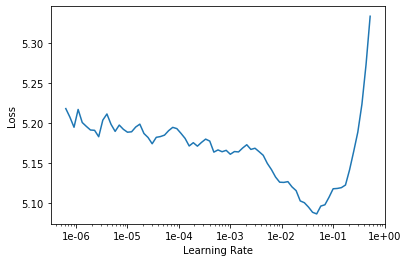

In [26]:
learn.recorder.plot(skip_end=15)

In [27]:
learn.fit_one_cycle(1, 0.05, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.742582,4.516707,0.236585,2:12:03


In [28]:
learn.save('fit_head')

In [29]:
learn.load('fit_head');

In [30]:
learn.unfreeze()

In [31]:
learn.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.094612,4.057229,0.284163,2:32:53
1,3.791999,3.680959,0.328019,2:32:39


/opt/anaconda3/envs/deeplearning/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/opt/anaconda3/envs/deeplearning/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


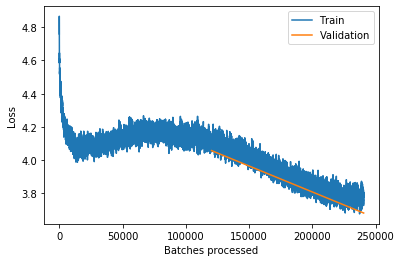

In [32]:
learn.recorder.plot_losses()

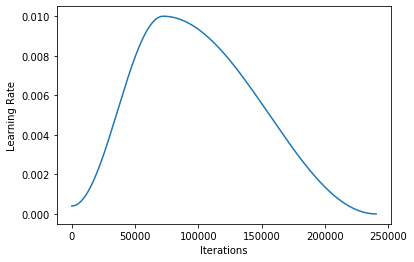

In [33]:
learn.recorder.plot_lr()

In [34]:
learn.save('fine_tuned')

In [35]:
learn.load('fine_tuned');

In [36]:
TEXT = "I liked this movie because"
N_WORDS = 40
N_SENTENCES = 2

In [37]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

I liked this movie because i was looking for a uni and i did n't want to go to the place instead . i expected a little more for a great place but it was just what i expected . It was clean and
I liked this movie because i had a late night group of friends ... i really liked that they had two people outside of the entire establishment , which is what i do so i do n't mind . However , i thought the


In [38]:
learn.save_encoder('fine_tuned_enc')

In [19]:
data_clas = TextList.from_csv(path, 'train.csv', cols=1).split_by_rand_pct(0.1).label_from_df(cols=0).databunch(bs=bs)

In [40]:
data_clas.save('data_clas.pkl')

In [20]:
data_clas = load_data(path, 'data_clas.pkl', bs=bs)

In [21]:
data_clas.show_batch()

text,target
"xxbos xxup wed , xxup march 27 , 2013 / / xxup xxunk \n xxup price xxup for 2 : $ xxunk ( xxup tr price ) + $ xxunk ( tax ) + $ xxunk ( tip ) = $ 80.00 \n xxup wait : 15 - 20mins \n xxup server : xxup dawn - ( 4 / 5 ) . xxmaj she looked frazzled but",5
"xxbos xxup this xxup is xxup your xxup warning xxrep 7 ! \n xxmaj also mike and craig both work for this place . i never write reviews but i felt like this was necessary after all the trouble i had . \n \n i lived in a 600 sq ft renovated 1 bedroom . xxmaj yes the redesign in the apartment is nice , but do n't",1
"xxbos xxmaj in our continuing quest to identify cool , locally owned places to eat and / or drink , xxmaj caroline and i xxunk xxmaj vintage 95 last night . \n \n xxmaj before i go further , understand that whenever i go out for eats or drinks , i have in mind a xxmaj platonic xxmaj ideal of the xxmaj bar / xxmaj pub / xxmaj eatery",4
"xxbos i do n't xxmaj love xxmaj district . \n xxmaj it 's something that i xxunk on all day before sitting down to write this review . i have finally come to terms with the fact that i do n't love the newest xxmaj downtown xxmaj phoenix gem , i simply xxmaj like . i had my first visit to xxmaj district last night after i made a",3
"xxbos xxmaj my fiance and i came here to celebrate me getting a new job and i went through the list of xxmaj bookmarks on xxmaj yelp trying to find a place . xxmaj we opted for here since i 'd never been . xxmaj we 've been to xxmaj mastro 's several times , xxmaj flemings , and the like but i had my two choices down to xxmaj",4


In [22]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc');

In [44]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


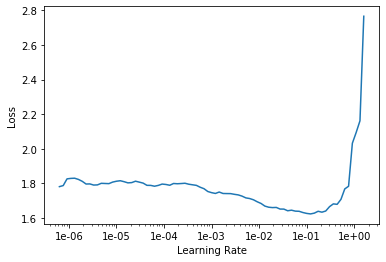

In [45]:
learn.recorder.plot()

In [46]:
learn.fit_one_cycle(4, 1e-02, moms=(0.8,0.7), 
                    callbacks=[callbacks.SaveModelCallback(learn, monitor='accuracy',mode='max', name='best-model')])

epoch,train_loss,valid_loss,accuracy,time
0,1.288545,1.134021,0.524547,46:04
1,1.274990,1.124473,0.506685,46:03
2,1.211278,1.081092,0.533485,46:04
3,1.181153,1.056235,0.542039,46:06


Better model found at epoch 0 with accuracy value: 0.5245465040206909.
Better model found at epoch 2 with accuracy value: 0.5334851145744324.
Better model found at epoch 3 with accuracy value: 0.5420390963554382.


In [47]:
learn.save('first')

In [23]:
learn.load('first');

In [24]:
learn.freeze_to(-2)
learn.fit_one_cycle(2, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.013017,1.152075,0.613456,53:38
1,0.952556,0.809337,0.653564,53:45


In [25]:
learn.save('second')

In [26]:
learn.load('second');

In [27]:
learn.freeze_to(-3)
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.965187,1.216622,0.615748,1:17:36
1,0.842824,0.770993,0.669841,1:17:33


In [28]:
learn.save('third')

In [29]:
learn.load('third');

In [30]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.847447,0.774452,0.670010,1:45:11
1,0.806389,0.756238,0.677103,1:45:11


In [31]:
learn.save('fully_trained')

In [32]:
learn.predict("I really loved that movie, it was awesome, excellent! This was the best movie ever")

(Category 5,
 tensor(4),
 tensor([3.7231e-05, 7.0804e-04, 1.8025e-03, 6.2485e-02, 9.3497e-01]))

In [33]:
learn.predict("What a horrible movie. Really not worth watching. Just avoid it")

(Category 1,
 tensor(0),
 tensor([9.9909e-01, 6.3488e-04, 2.7831e-04, 2.2764e-08, 3.5285e-12]))